<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/regression_residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shapiro-Wilk Test Statistic: 0.7479453682899475, P-Value: 3.549268226703756e-17
The residuals do not seem to be normally distributed.


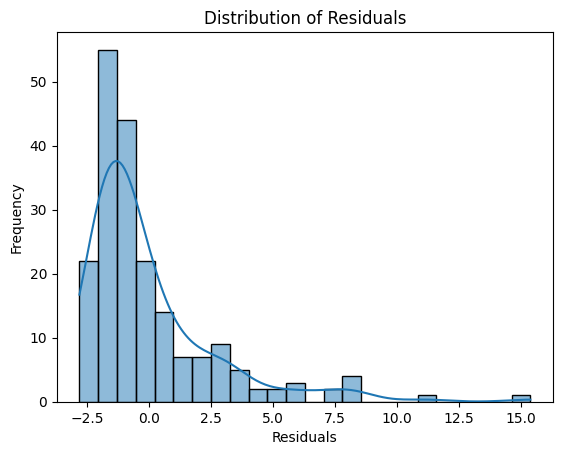

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# Generating synthetic data
np.random.seed(0)  # For reproducibility
X = 2.5 * np.random.randn(1000) + 1.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(1000)       # Generate 1000 residual terms
y = 2 + 0.3 * X**2 + res                   # Actual values of Y

# Reshape X for sklearn
X = X.reshape(-1, 1)

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
predictions = model.predict(X_test)

# Calculating residuals
residuals = y_test - predictions

# Plotting residuals to check for normality
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Conducting Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {stat}, P-Value: {p_value}')

# Interpretation of the Shapiro-Wilk test
if p_value > 0.05:
    print("The residuals seem to be normally distributed.")
else:
    print("The residuals do not seem to be normally distributed.")
